In [2]:
!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

In [5]:
df=pdr.get_data_tiingo('AAPL',api_key='44999a3fe770c437c365bee84c364d211d622c8d')

C:\Users\Rutvik\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv("AAPL.csv")

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("AAPL.csv")

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-06 00:00:00+00:00,130.29,130.500,128.90,129.13,26845924,30.656220,30.705632,30.329164,30.383281,107383696,0.00,1.0
1,AAPL,2017-02-07 00:00:00+00:00,131.53,132.090,130.45,130.54,38183841,30.947983,31.079746,30.693867,30.715043,152735364,0.00,1.0
2,AAPL,2017-02-08 00:00:00+00:00,132.04,132.220,131.22,131.35,23004072,31.067982,31.110334,30.875042,30.905630,92016288,0.00,1.0
3,AAPL,2017-02-09 00:00:00+00:00,132.42,132.445,131.12,131.65,28349859,31.291509,31.297417,30.984313,31.109554,113399436,0.57,1.0
4,AAPL,2017-02-10 00:00:00+00:00,132.12,132.940,132.05,132.46,20065458,31.220618,31.414388,31.204076,31.300961,80261832,0.00,1.0


In [10]:
df.shape

(1259, 14)

In [17]:
df1=df.reset_index()["close"]

In [19]:
df1.head()

0    130.29
1    131.53
2    132.04
3    132.42
4    132.12
Name: close, dtype: float64

In [20]:
import matplotlib.pyplot as plt

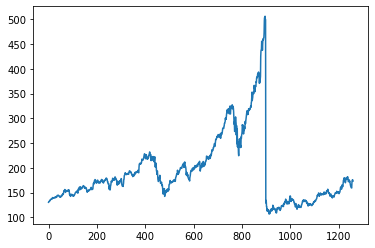

In [21]:
plt.plot(df1)

In [22]:
#lstm are sensitive to the scale of the data . so we apply minmax scaler

In [23]:
import numpy as np

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
df1.shape

(1259, 1)

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [30]:
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [31]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [32]:
print(x_train)

[[0.05873513 0.06184095 0.06311835 ... 0.09763306 0.09239825 0.09765811]
 [0.06184095 0.06311835 0.06407013 ... 0.09239825 0.09765811 0.09227301]
 [0.06311835 0.06407013 0.06331872 ... 0.09765811 0.09227301 0.09312461]
 ...
 [0.41044458 0.40095178 0.40485911 ... 0.43015654 0.45307451 0.46827802]
 [0.40095178 0.40485911 0.41059487 ... 0.45307451 0.46827802 0.45643081]
 [0.40485911 0.41059487 0.41232311 ... 0.46827802 0.45643081 0.46667502]]


In [33]:
x_test.shape

(340, 100)

In [34]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 344ms/step - loss: 0.0173 - val_loss: 0.0023
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0036 - val_loss: 0.0064
Epoch 3/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0011 - val_loss: 4.3685e-04
Epoch 5/100
12/12 [==============================] - 3s 222ms/step - loss: 9.6183e-04 - val_loss: 3.9317e-04
Epoch 6/100
12/12 [==============================] - 3s 222ms/step - loss: 9.6443e-04 - val_loss: 4.1071e-04
Epoch 7/100
12/12 [==============================] - 3s 217ms/step - loss: 9.0475e-04 - val_loss: 6.0186e-04
Epoch 8/100
12/12 [==============================] - 3s 211ms/step - loss: 8.9274e-04 - val_loss: 3.1687e-04
Epoch 9/100
12/12 [==============================] - 3s 211ms/step - loss: 8.5341e-04 - val_loss: 3.6914e-04
Epoch 10/100
12/12 [==========================

Epoch 76/100
12/12 [==============================] - 3s 212ms/step - loss: 3.4905e-04 - val_loss: 1.6454e-04
Epoch 77/100
12/12 [==============================] - 2s 209ms/step - loss: 3.2478e-04 - val_loss: 1.5414e-04
Epoch 78/100
12/12 [==============================] - 3s 210ms/step - loss: 2.9422e-04 - val_loss: 1.3888e-04
Epoch 79/100
12/12 [==============================] - 2s 209ms/step - loss: 2.9713e-04 - val_loss: 1.9657e-04
Epoch 80/100
12/12 [==============================] - 2s 209ms/step - loss: 3.1035e-04 - val_loss: 1.3135e-04
Epoch 81/100
12/12 [==============================] - 2s 208ms/step - loss: 2.9783e-04 - val_loss: 1.5589e-04
Epoch 82/100
12/12 [==============================] - 2s 209ms/step - loss: 2.8213e-04 - val_loss: 1.3922e-04
Epoch 83/100
12/12 [==============================] - 2s 208ms/step - loss: 2.9595e-04 - val_loss: 1.8318e-04
Epoch 84/100
12/12 [==============================] - 2s 209ms/step - loss: 3.2481e-04 - val_loss: 1.3910e-04
Epoch 85/1

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [43]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

203.79772134406062

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

139.5808954378707

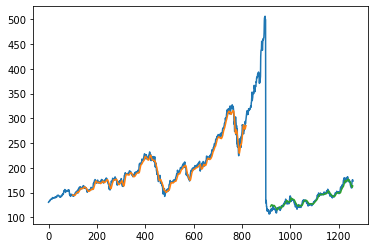

In [49]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1529104]
101
1 day input [0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217
 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759
 0.1636819  0.16588604 0.15769568 0.

11 day output [[0.153011]]
12 day input [0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866   0.17257358 0.16904195 0.18149029
 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611
 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802
 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048
 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584
 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327

 0.14940062 0.14850248 0.14761281 0.14673412]
19 day output [[0.1458683]]
20 day input [0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.1529104  0.15640759

29 day output [[0.13809064]]
[[0.15291039645671844], [0.15640759468078613], [0.15812882781028748], [0.15865181386470795], [0.15848077833652496], [0.15794892609119415], [0.15724307298660278], [0.15645532310009003], [0.15562593936920166], [0.15477129817008972], [0.15389825403690338], [0.1530109941959381], [0.15211345255374908], [0.15120987594127655], [0.15030424296855927], [0.14940062165260315], [0.14850248396396637], [0.1476128101348877], [0.1467341184616089], [0.14586830139160156], [0.14501695334911346], [0.1441810578107834], [0.14336144924163818], [0.14255854487419128], [0.1417725533246994], [0.14100348949432373], [0.14025112986564636], [0.13951513171195984], [0.1387951672077179], [0.13809064030647278]]


In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

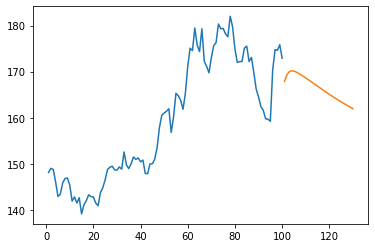

In [56]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

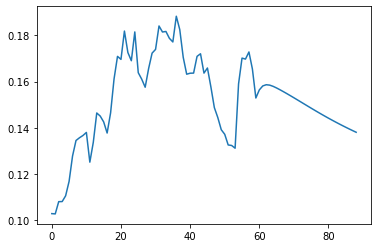

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

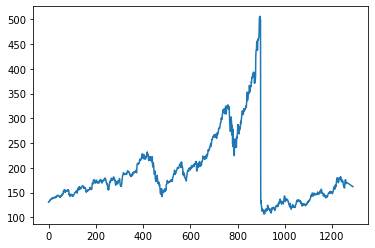

In [59]:
plt.plot(df3)